In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal
from scipy.signal import firwin, lfilter
import pywt
import neurokit2 as nk


In [2]:
def cargar_y_procesar_senal(archivo, columna, Fs):
    array = np.genfromtxt(archivo, delimiter="\t", skip_header=3, missing_values=0)
    senal = array[:, columna]
    Ts = 1 / Fs
    n = len(senal)
    t = np.arange(0, n * Ts, Ts)
    return t, senal 

Text(0.5, 1.0, 'Señal Original')

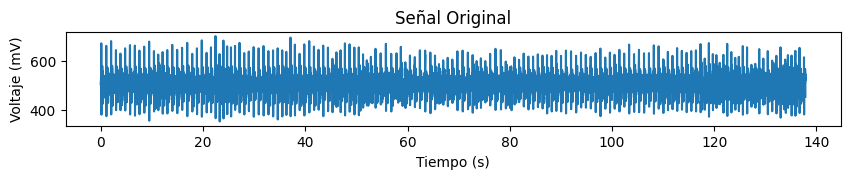

In [3]:
t_ecg, signalecg = cargar_y_procesar_senal("ecg_daniel_3.txt", 5, 1000)

niveles = 5
coeficientes = pywt.wavedec(signalecg, 'db6', level=niveles)

plt.figure(figsize=(10, 10))
plt.subplot(niveles + 2, 1, 1)
plt.plot(t_ecg,signalecg)
plt.ylabel('Voltaje (mV)')
plt.xlabel('Tiempo (s)')
plt.title('Señal Original')

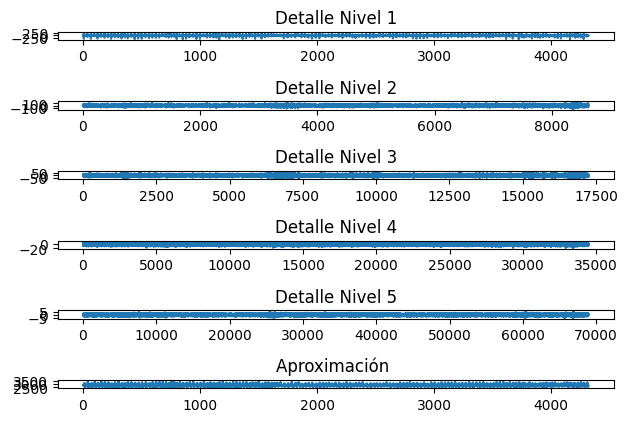

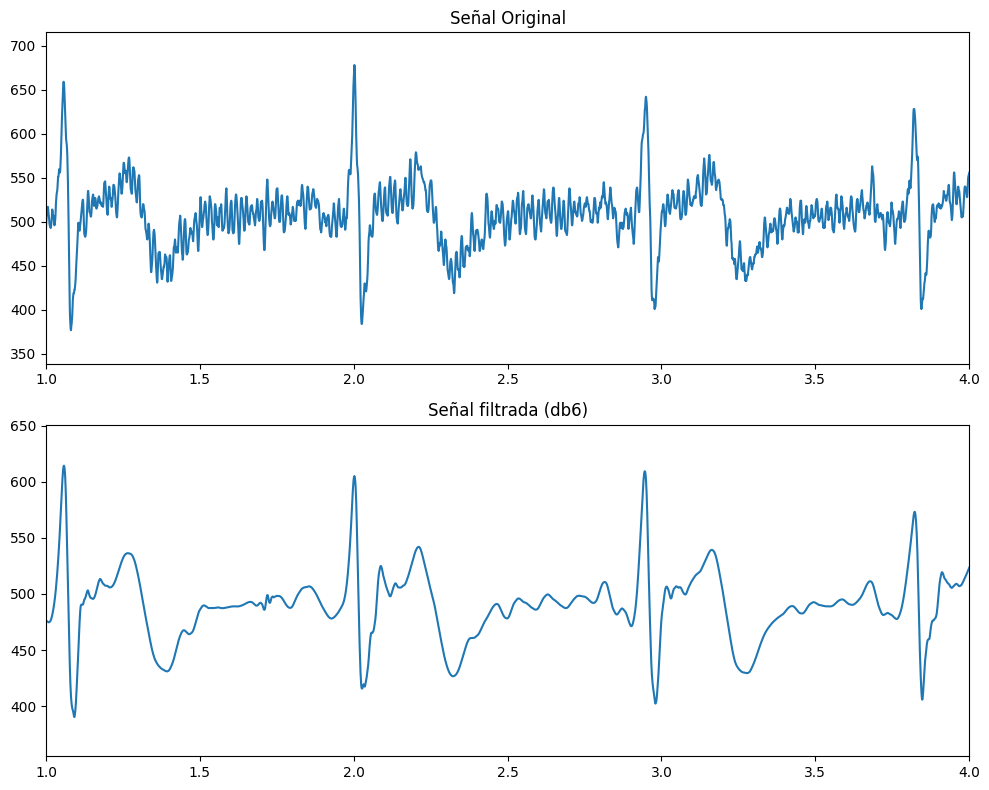

In [4]:
# Graficar los coeficientes de detalle
for i, detalle in enumerate(coeficientes[1:]):  # Empezar desde el segundo nivel
    plt.subplot(niveles + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

# Graficar el coeficiente de aproximación
plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación ')

plt.tight_layout()
plt.show()

umbral = 100

coeficientes_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes]

senal_denoised = pywt.waverec(coeficientes_umbral, 'db6')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t_ecg, signalecg)
plt.xlim(1,4)
plt.title('Señal Original')

plt.subplot(2, 1, 2)
plt.plot(t_ecg, senal_denoised)
plt.xlim(1,4)
plt.title('Señal filtrada (db6)')

plt.tight_layout()
plt.show()

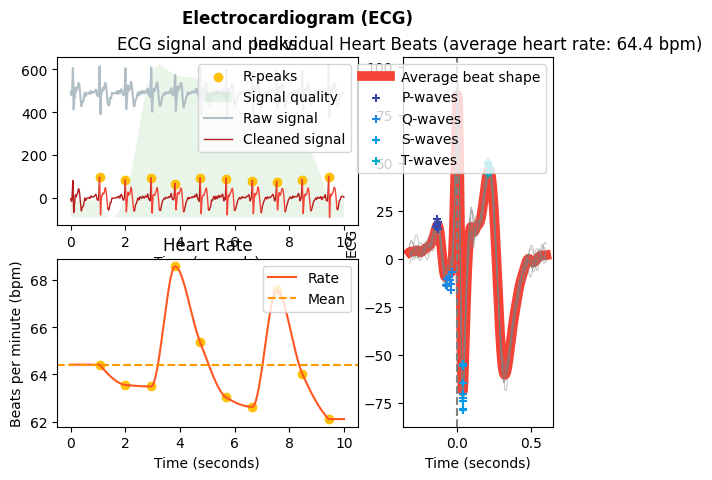

In [5]:
ecg_signals, info = nk.ecg_process(senal_denoised[0:10000], sampling_rate=1000)
nk.ecg_plot(ecg_signals, info)


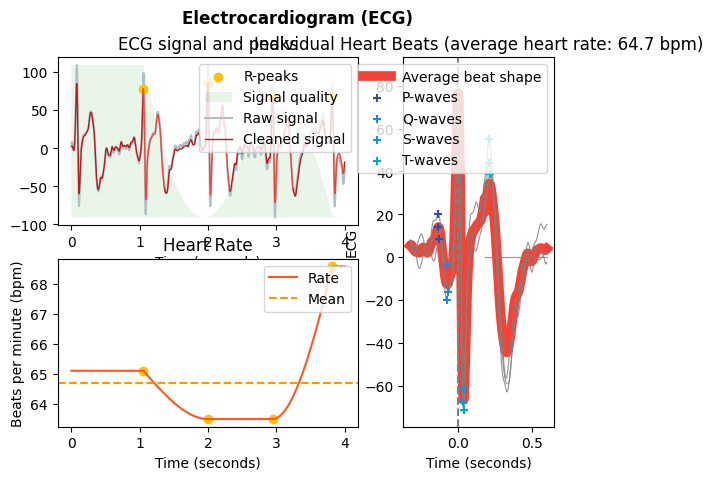

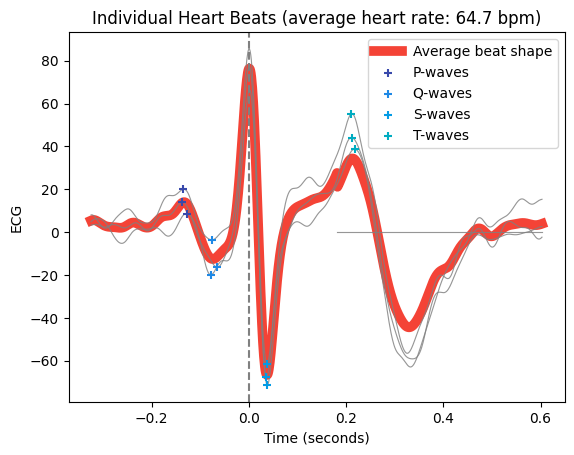

In [6]:

new_sig=nk.ecg_clean(signalecg[0:4000], sampling_rate=1000, method="neurokit")
ecg_signals2, info2 = nk.ecg_process(new_sig, sampling_rate=1000)
nk.ecg_plot(ecg_signals2,info2)

qrs_epochs = nk.ecg_segment(ecg_signals2, rpeaks=None, sampling_rate=1000, show=True)

In [7]:
import numpy as np
from biosppy.signals import ecg

rpeaks=ecg.ASI_segmenter(signal=senal_denoised, sampling_rate=1000.0, Pth=5.0)
indices_r=ecg.christov_segmenter(signal=senal_denoised, sampling_rate=1000.0)

[ts,filt,rpeaks2,templates_ts,templates,heart_rate_ts,HR]=ecg.ecg(signal=senal_denoised[0:5000], sampling_rate=1000.0, path=None, show=True, interactive=True)